# Collatz Conjecture (MP7) - Aishwarya Mehra and Kavita Srinivasan, Lab AYJ

## Introduction

Take some integer $n$ greater than 1. 

* If it's even, divide by 2 (to get $n/2$). 
* If it's odd, multiply $n$ by 3 and add 1 ($3n + 1$). 

Now, repeat this procedure with the new $n$, till you get $n = 1$. 

Clearly, if $n$ is odd, the value of $n$ will increase after you apply the above procedure. And if $n$ is even, the value of $n$ will decrease after you apply the above procedure. Interestingly, there is a conjecture, known as the Collatz conjecture, which predicts that for all $n$, applying this iterative scheme will always bring the number down to 1.

We decided to model this on Python using the concepts learned in CS 125.

In [1]:
# Import plotting library
import matplotlib.pyplot as plt
%matplotlib inline

## An Iterative Scheme

To start off, we modelled the Collatz procedure using an iterative while loop. Three cases were included:

* If n = 1, the base case has been reached, and the loop can be terminated
* If n is even, divide it by 2
* Else (n must be odd), multiply it by 3 and add 1

In [2]:
def collatz(n):
    n_vals = []
    
    while (True):
        n_vals.append(n)
        
        if (n == 1):
            break
        
        if (n % 2 == 0):
            n = n/2
        
        else:
            n = 3*n + 1
    
    steps = [i for i in range(len(n_vals))]
    plt.plot(steps, n_vals, '-o')
    plt.xlabel('Step')
    plt.ylabel('n')
    print("It took %d steps to get to 1." %steps[-1])
    plt.show()

It took 7 steps to get to 1.


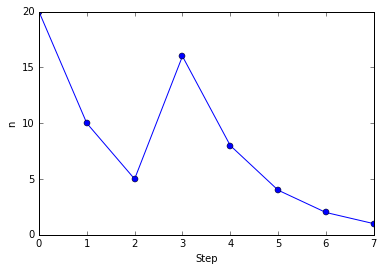

In [3]:
collatz(20)

## A Recursive Scheme

The nature of this problem is inherently recursive, which became apparent when we wrote the iterative scheme above. So next, we decided to implement the same logic recursively.

This function has a wrapper (collatz2(n)), which has a helper function within it (collatz2_helper(n, step)). The outside function initializes one list, n_vals, to keep track of the value of n at each step. The helper function looks identical to the iterative scheme above, and appends the n value to the list created in the outside function.

In [4]:
def collatz2(n):
    n_vals = []
    
    def collatz2_helper(n, step):        
        n_vals.append(n)
        
        if (n == 1):
            return

        if (n % 2 == 0):
            collatz2_helper(n/2, step + 1)

        else:
            collatz2_helper(3*n + 1, step + 1)
    
    collatz2_helper(n, 0)
    steps = [i for i in range(len(n_vals))]
    plt.plot(steps, n_vals, '-o')
    plt.xlabel('Step')
    plt.ylabel('n')
    print("It took %d steps to get to 1." %steps[-1])

Below is a test case for collatz2(n), using n = 20. This produces the same plot as the iterative scheme, which is to be expected. This also allows us to do a "sanity check" to make sure the code is working as we expect it to.

It took 7 steps to get to 1.


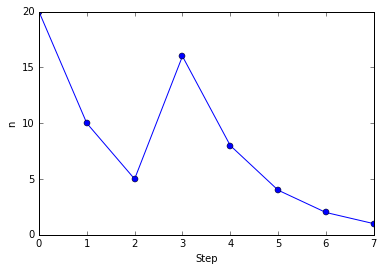

In [5]:
collatz2(20)

## A Recursive Scheme with Memoization

If we were to run collatz2(40), the first recursive call would be made to collatz2(20). However, since we already know what collatz2(20) is going to produce, it would make sense to have some variable to store the sequences that the algorithm has already seen so far. This implements the concept of memoization to make the algorithm faster.

The function collatz3(n) below is very similar to collatz2(n), but a new dictionary seen_so_far was initialized beforehand. The helper function checks to see if the number $n$ has already been called before, and terminates early if such is the case.

In [6]:
seen_so_far = {}
def collatz3(n):
    n_vals = []
    
    def collatz3_helper(n, step):
        if n in seen_so_far.keys():
            n_vals.extend(seen_so_far[n])
            return
        
        n_vals.append(n)
        
        if (n == 1):
            return

        if (n % 2 == 0):
            collatz3_helper(n/2, step + 1)

        else:
            collatz3_helper(3*n + 1, step + 1)
    
    collatz3_helper(n, 0)
    steps = [i for i in range(len(n_vals))]
    seen_so_far[n] = n_vals
    plt.plot(steps, n_vals, '-o')
    plt.xlabel('Step')
    plt.ylabel('n')
    print("It took %d steps to get to 1." %steps[-1])

It took 112 steps to get to 1.


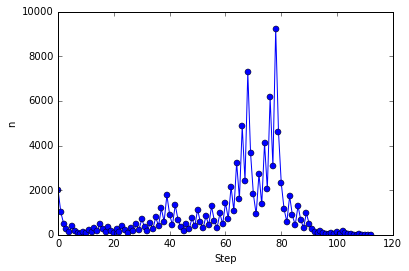

In [8]:
# Run collatz3(1000), then collatz3(2000). You will observe that the time needed to get collatz3(2000) is very short.
collatz3(1000)
#collatz3(2000)

## Incorporating user input

We also decided to incorporate a way for the user to pick the number that they would like to try.

Please enter a number between 2 and 1000, inclusive: 30
It took 18 steps to get to 1.


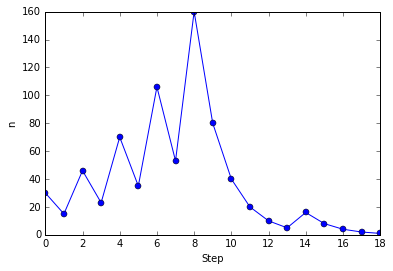

In [9]:
number = input("Please enter a number between 2 and 1000, inclusive: ")
collatz3(int(number))

## Plotting n values against number of iterations to reach 1

After the user has tried several different n values, they may want to see how the number of iterations change as a function of n. The code below achieves this.

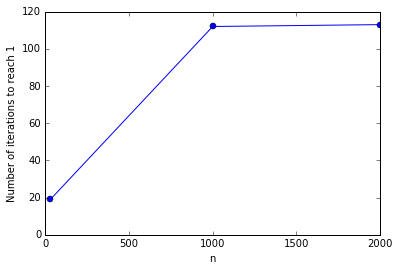

In [10]:
n_vals = list(seen_so_far.keys())
n_vals.sort()
y_vals = [] # number of iterations to reach 1
for n in n_vals:
    iterations = len(seen_so_far[n])
    y_vals.append(iterations)
    
plt.plot(n_vals, y_vals, '-o')
plt.xlabel('n')
plt.ylabel('Number of iterations to reach 1')
plt.show()